In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [134]:
pd.set_option('display.max_columns', None)

In [135]:
df = pd.read_csv('../../../../data/raw/nb_data/4. cleaned_data_L2/gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [136]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0


In [137]:
df.shape

(3677, 23)

In [138]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

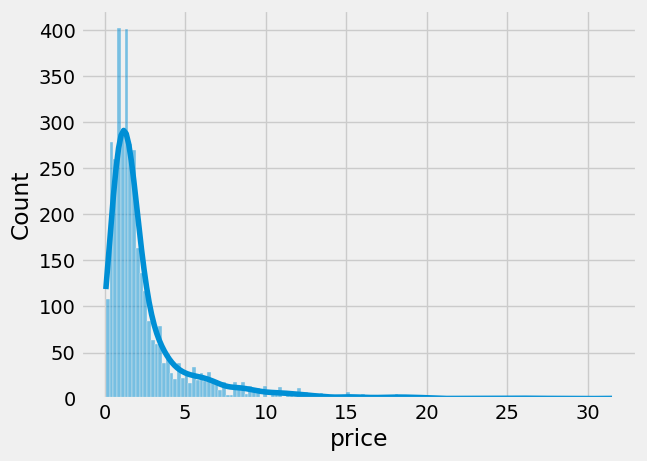

In [139]:
# outliers on the basis of price column
sns.histplot(df['price'], kde=True)
plt.show()

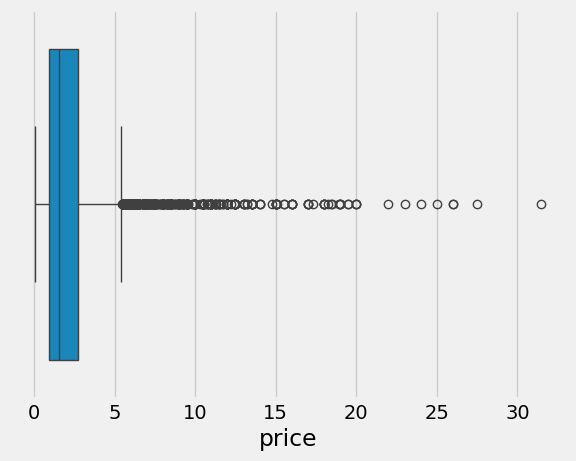

In [140]:
sns.boxplot(x=df['price'])
plt.show()

In [141]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)].copy()

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [142]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
318,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
3106,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
1874,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
233,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
2301,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,2,0
2886,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2869,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
184,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,2,54
695,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
2594,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97


#### On the basis of price col we can say that there are some genuine outliers but there are some data errors as well.

### Price_per_sqft

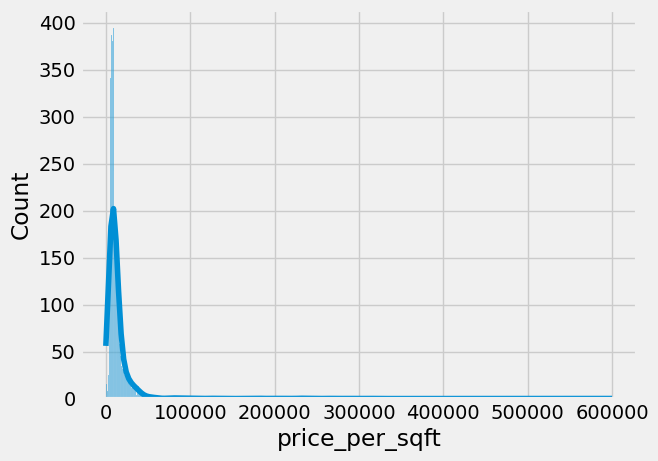

In [143]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.show()

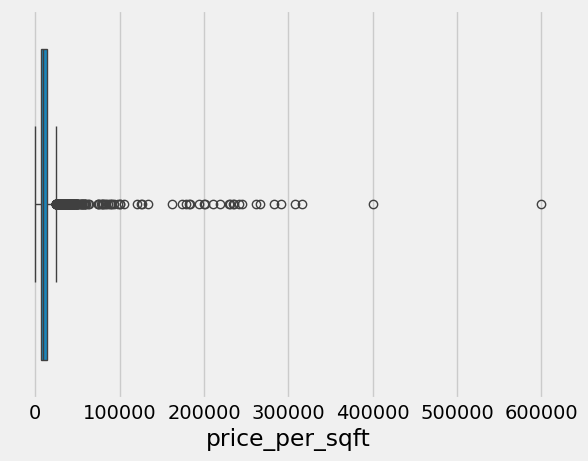

In [144]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

In [145]:
# Calculate the IQR for the 'price_pre_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)].copy()

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [146]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

In [147]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

In [148]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [149]:
df.update(outliers_sqft)

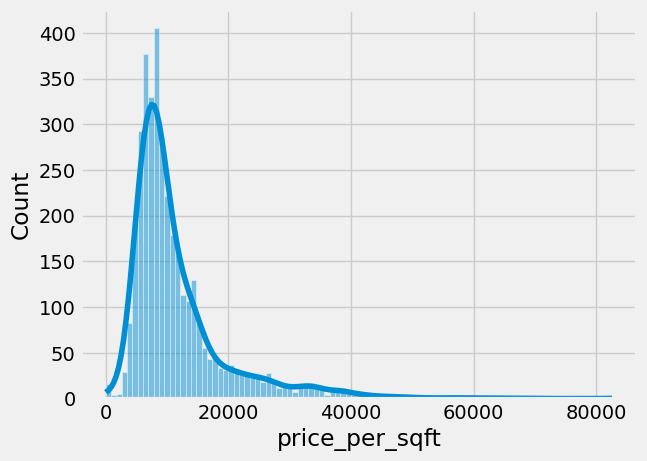

In [150]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.show()

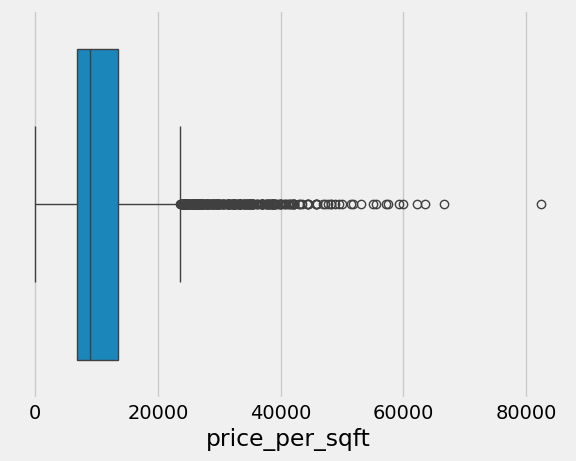

In [151]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

In [152]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
171,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,2,0
233,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
246,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,0,75
1010,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
1272,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
1690,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1748,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,0,137
1874,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2610,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,2,0
2886,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122


In [153]:
df = df[df['price_per_sqft'] <= 50000]

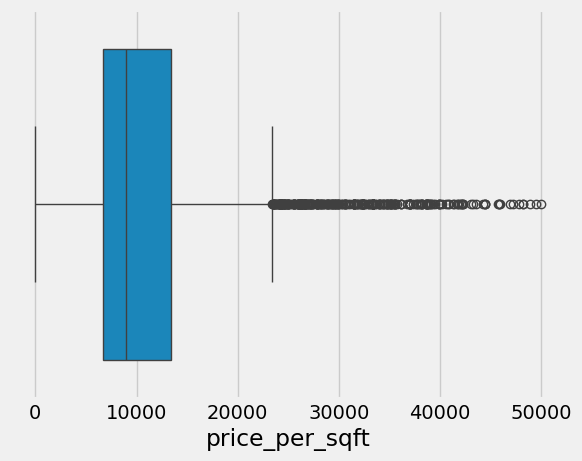

In [154]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

### Area

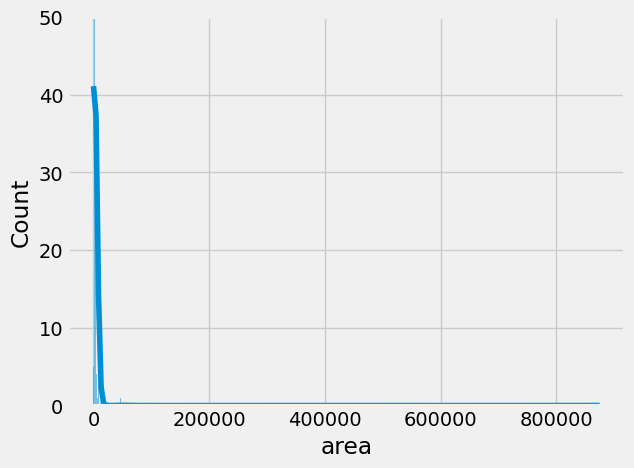

In [155]:
sns.histplot(df['area'], kde=True)
plt.ylim(top=50)
plt.show()

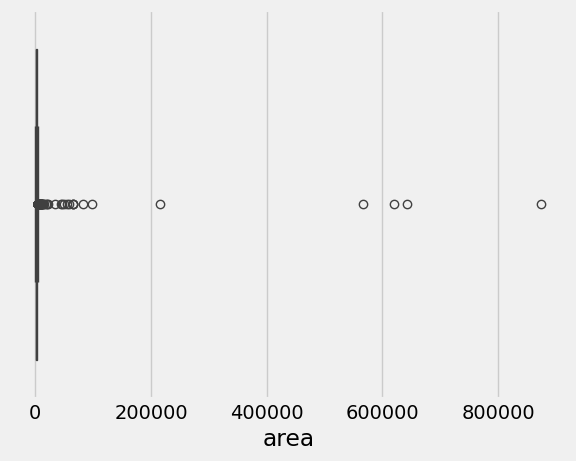

In [156]:
sns.boxplot(x=df['area'])
plt.show()

In [157]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [158]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1281,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
1329,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,2,65
1471,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44
1698,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,2,44
2546,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,2,76


In [159]:
df.shape

(3647, 23)

In [160]:
### keeping area less than 1 lacs as greater than 1 lacs are data error entries
df = df[df['area'] < 100000]

In [161]:
df.shape

(3642, 23)

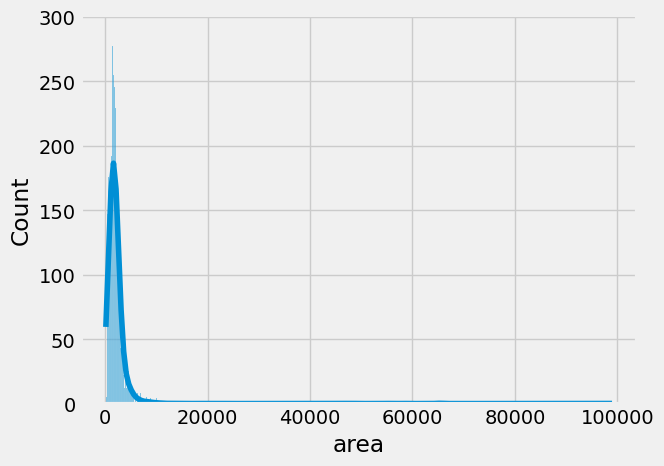

In [162]:
sns.histplot(df['area'], kde=True)
plt.show()

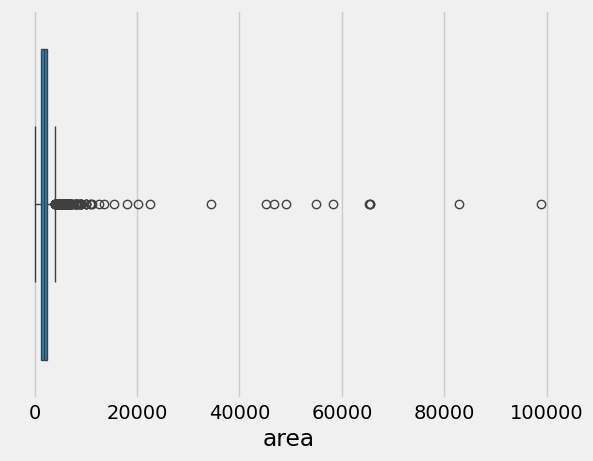

In [163]:
sns.boxplot(x=df['area'])
plt.show()

In [164]:
df.reset_index(drop=True)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0
2,house,bptp astaire gardens,sector 70a,1.18,8137.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0,0,0,0,1,1,153
3,flat,cghs airport apartment,sector 47,1.65,7857.0,2100.0,Super Built up area 2100(195.1 sq.m.)Carpet ar...,3,3,3,1.0,North-East,Old Property,2100.0,NaN,1720.0,0,0,0,0,1,1,136
4,flat,m3m woodshire,sector 107,1.65,5960.0,2768.0,Super Built up area 2768(257.16 sq.m.),4,5,3+,12.0,North-West,Relatively New,2768.0,NaN,NaN,0,1,0,0,0,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
3638,flat,gls arawali homes,sohna road,0.30,4687.0,640.0,Carpet area: 640 (59.46 sq.m.),2,2,2,4.0,NaN,Relatively New,NaN,NaN,640.0,0,0,0,0,0,2,42
3639,flat,dlf the ultima,sector 81,3.50,11686.0,2995.0,Super Built up area 2995(278.24 sq.m.)Carpet a...,4,5,3+,7.0,North-East,Relatively New,2995.0,NaN,2200.0,0,1,0,0,0,0,174
3640,flat,emaar mgf emerald floors premier,sector 65,2.80,16969.0,1650.0,Super Built up area 1975(183.48 sq.m.)Built Up...,4,4,3,2.0,North,Relatively New,1975.0,1800.0,1650.0,1,0,0,0,0,1,89


In [165]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1012,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
513,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,2,7
2337,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,2,51
1242,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,2,15
937,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,2,0
490,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,2,15
2352,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,2,37
729,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,2,37
1259,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2414,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,2,33


In [166]:
df.drop(index=[1012, 1242, 2337, 490, 2352, 729, 2414, 2473, 2325], inplace=True)

In [167]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
513,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,2,7
937,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,2,0
1259,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1643,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
3357,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
1788,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
929,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,2,160
1903,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,2,55
3106,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2953,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,2,60


In [168]:
df.loc[513,'area'] = 115*9
df.loc[937,'area'] = 7250
df.loc[1259,'area'] = 5800
df.loc[1643,'area'] = 2660
df.loc[3357,'area'] = 2850
df.loc[1788,'area'] = 1812
df.loc[929,'area'] = 2160
df.loc[1903,'area'] = 1175

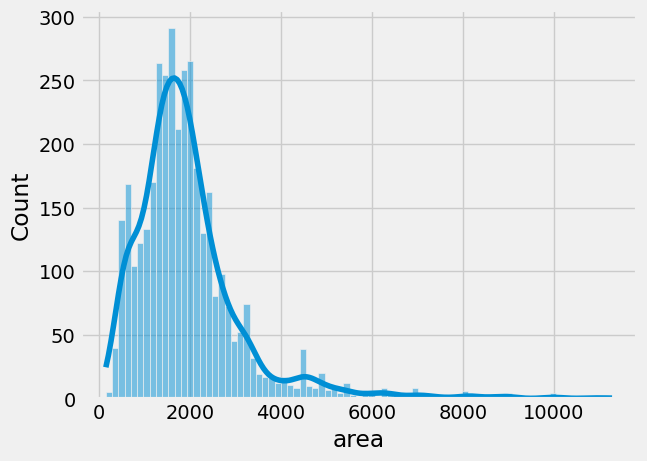

In [169]:
sns.histplot(df['area'], kde=True)
plt.show()

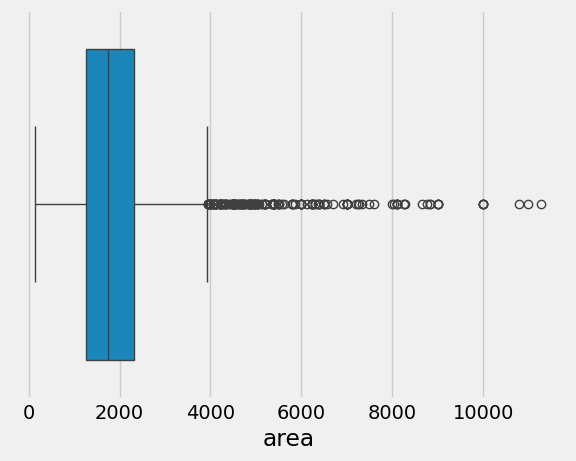

In [170]:
sns.boxplot(x=df['area'])
plt.show()

In [171]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

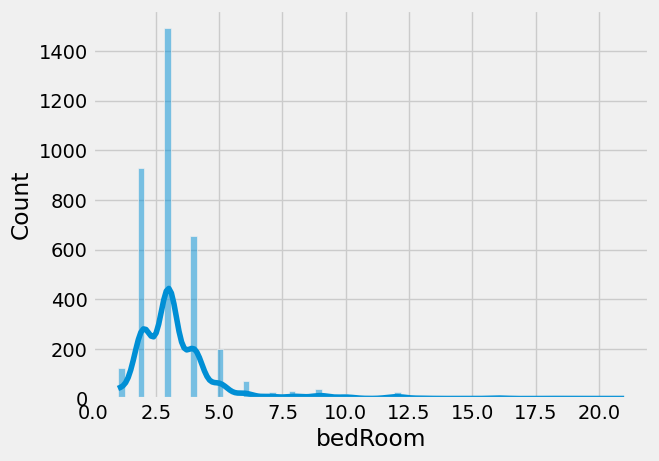

In [172]:
sns.histplot(df['bedRoom'], kde=True)
plt.show()

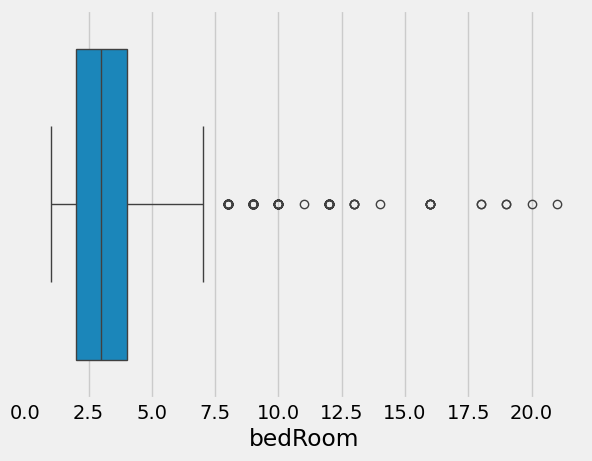

In [173]:
sns.boxplot(x=df['bedRoom'])
plt.show()

In [174]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [175]:
### These data seems outliers
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2621,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,0,49
2968,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,0,22
526,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,2,74
844,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,2,68
3102,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,0,57
3603,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,0,70
2171,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
1789,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
1422,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
3035,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [176]:
df.shape

(3633, 23)

In [177]:
### removing outliers data > 10 bedrooms
df = df[df['bedRoom'] <= 10]

In [178]:
df.shape

(3588, 23)

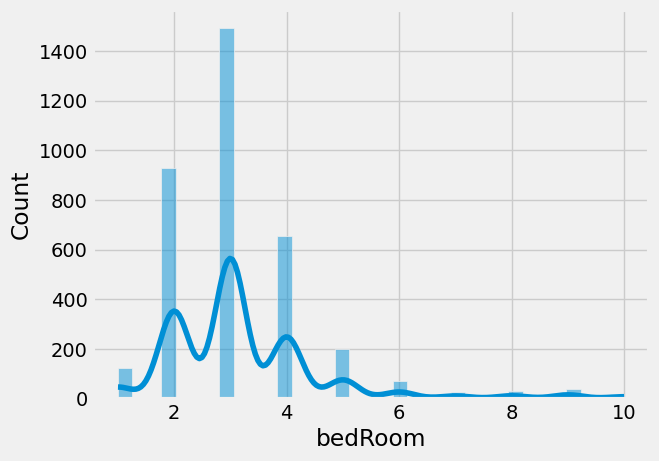

In [179]:
sns.histplot(df['bedRoom'], kde=True)
plt.show()

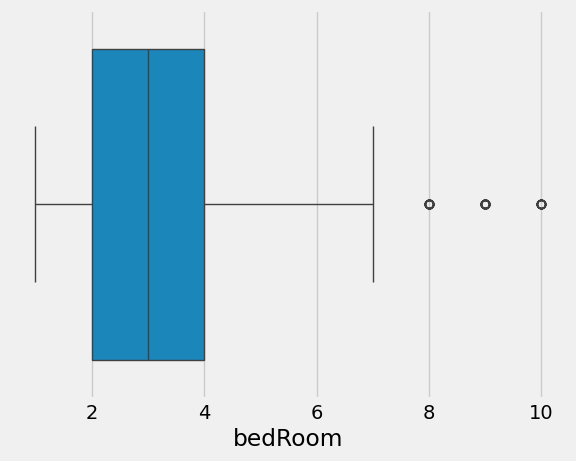

In [180]:
sns.boxplot(x=df['bedRoom'])
plt.show()

In [181]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

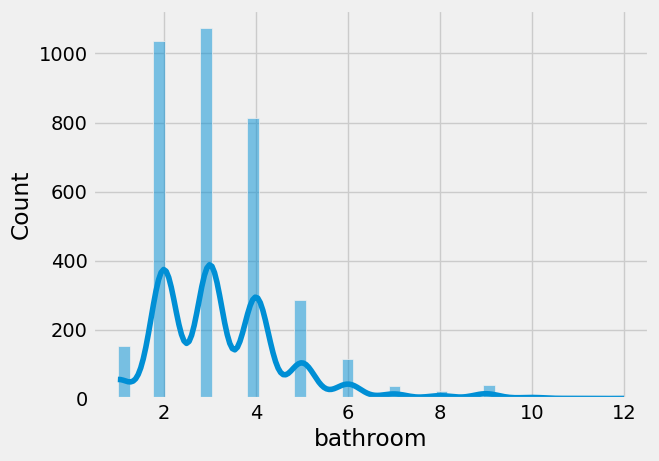

In [182]:
sns.histplot(df['bathroom'], kde=True)
plt.show()

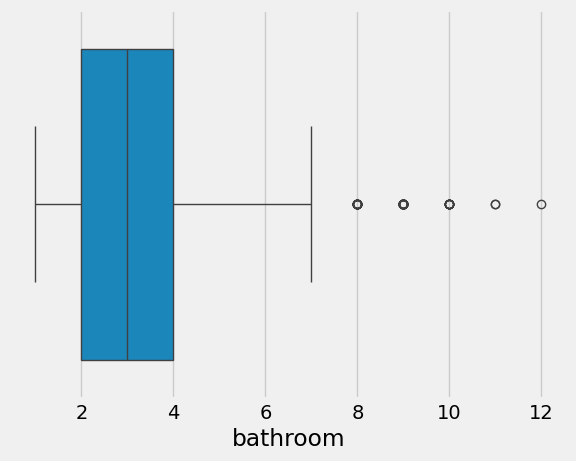

In [183]:
sns.boxplot(x=df['bathroom'])
plt.show()

In [184]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
799,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
1929,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,0,38
1977,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


In [185]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0


### super built up area

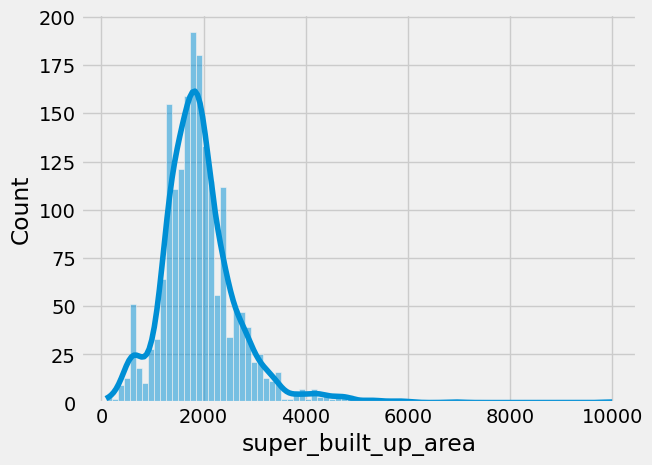

In [186]:
sns.histplot(df['super_built_up_area'], kde=True)
plt.show()

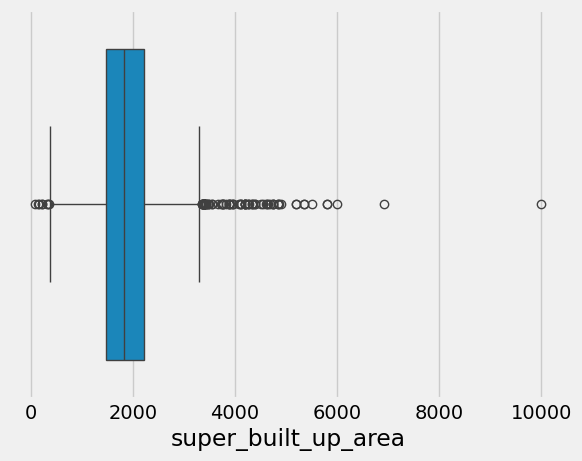

In [187]:
sns.boxplot(x=df['super_built_up_area'])
plt.show()

In [188]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [189]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
548,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,2,49
2800,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140


### built up area

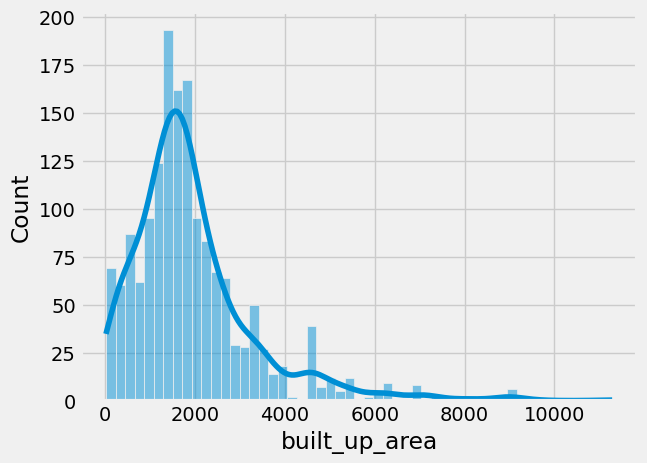

In [190]:
sns.histplot(df['built_up_area'], kde=True)
plt.show()

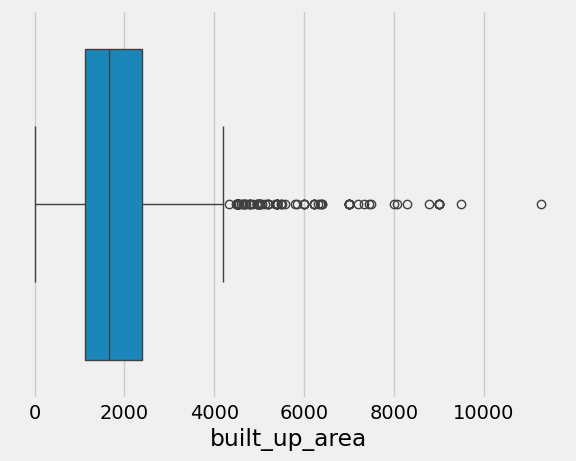

In [191]:
sns.boxplot(x=df['built_up_area'])
plt.show()

In [192]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3106,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


### carpet area

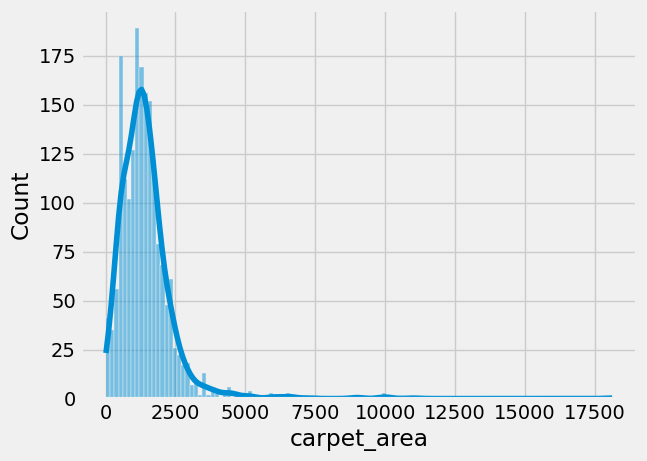

In [193]:
sns.histplot(df['carpet_area'], kde=True)
plt.show()

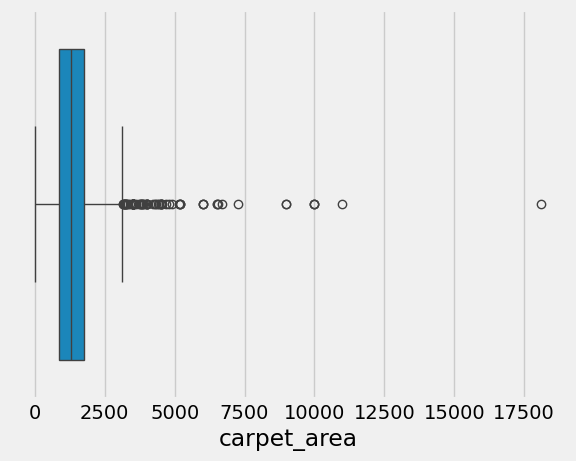

In [194]:
sns.boxplot(x=df['carpet_area'])
plt.show()

In [195]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1788,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2953,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,2,60


In [196]:
df.loc[1788,'carpet_area'] = 1812

In [197]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2953,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,2,60


In [198]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0


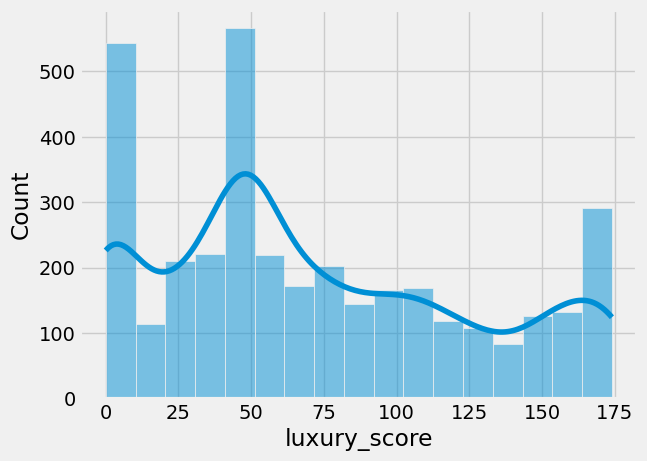

In [199]:
sns.histplot(df['luxury_score'], kde=True)
plt.show()

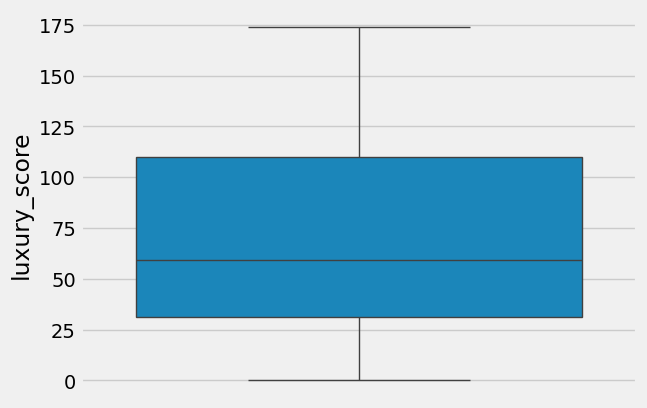

In [200]:
sns.boxplot(df['luxury_score'])
plt.show()

In [201]:
df.shape

(3588, 23)

In [202]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79


In [203]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [204]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0


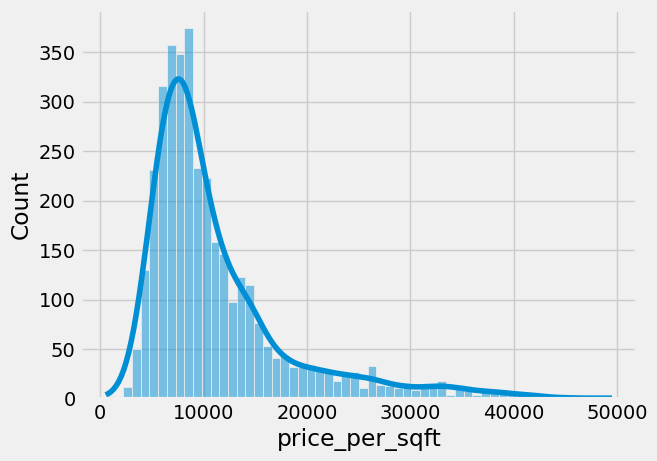

In [205]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.show()

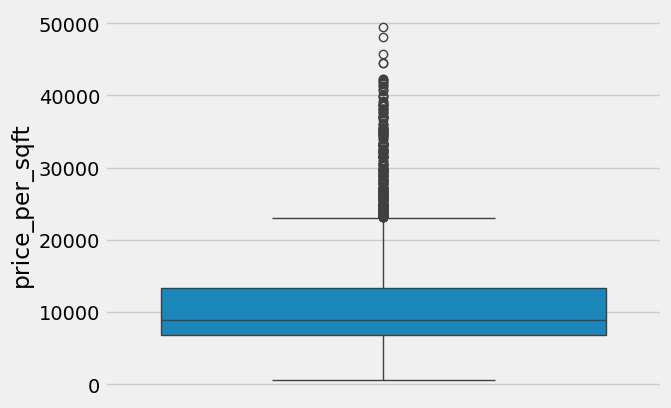

In [206]:
sns.boxplot(df['price_per_sqft'])
plt.show()

In [207]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
208,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,0,0
1290,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
1819,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
1868,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
1892,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
2501,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,2,0
2594,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97
3055,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
3103,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7


In [208]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [209]:
df[(df['area']/df['bedRoom'])<250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,jacobpura,sector 12,0.53,14601.0,363.0,Plot area 360(33.45 sq.m.),4,4,2,3.0,East,Relatively New,NaN,360.0,NaN,0,0,0,0,0,2,0
40,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8,4,3+,2.0,West,Old Property,NaN,1800.0,NaN,0,0,0,0,0,2,7
48,house,independent,sector 24,3.50,32407.0,1080.0,Plot area 120(100.34 sq.m.),5,4,3,3.0,North-West,Old Property,NaN,1080.0,NaN,0,0,0,0,0,2,15
54,house,independent,sector 2,1.15,19360.0,594.0,Plot area 66(55.18 sq.m.),3,3,2,2.0,South-East,Old Property,NaN,594.0,NaN,0,0,0,0,0,1,32
70,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.000000,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,house,independent,sohna road road,1.20,22305.0,538.0,Plot area 50,4,4,3+,4.0,West,Old Property,NaN,535.0,NaN,0,0,0,0,0,2,8
3588,flat,signature global solera,sector 107,0.28,5622.0,498.0,Carpet area: 489 (45.43 sq.m.),2,2,2,14.0,North-West,Relatively New,NaN,NaN,489.000000,0,0,0,0,0,2,38
3594,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10,7,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0,0,0,0,0,2,0
3597,house,independent,sector 7,1.16,11694.0,992.0,Plot area 992(92.16 sq.m.)Carpet area: 992 sq....,5,4,2,3.0,North-East,Moderately Old,NaN,NaN,992.000000,0,0,0,0,1,2,39


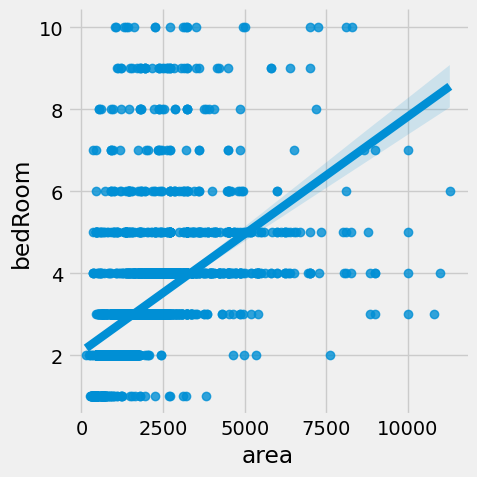

In [210]:
sns.lmplot(data=df, x='area', y='bedRoom')
plt.show()

In [211]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [212]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
4     17
6     17
9     15
8     12
10     8
7      8
Name: count, dtype: int64

In [213]:
df.shape

(3588, 24)

In [214]:
### removing those potential outliers where area_room_ratio is less than 100
df = df[df['area_room_ratio'] > 100]

In [215]:
df.shape

(3568, 24)

In [218]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)].copy()

Updating bedRoom values according to floorNum considering these are houses made over plots

In [219]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])

In [220]:
df.update(outliers_df)

In [221]:
df.shape

(3568, 24)

In [222]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [223]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
70,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,2,0,166.666667
403,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,2,0,198.000000
428,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,2,0,225.000000
560,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,2,0,150.000000
1445,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,2,29,120.600000
1487,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1499,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,2,8,200.000000
1611,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,2,0,113.000000
1972,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,2,0,222.750000
2282,house,independent,sector 3,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,2,0,180.000000


In [224]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [225]:
df.shape

(3568, 24)

In [226]:
### Removing outliers where area_room_ratio is less than 250 & bedRoom are greater than 4

df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [227]:
df.shape

(3555, 24)

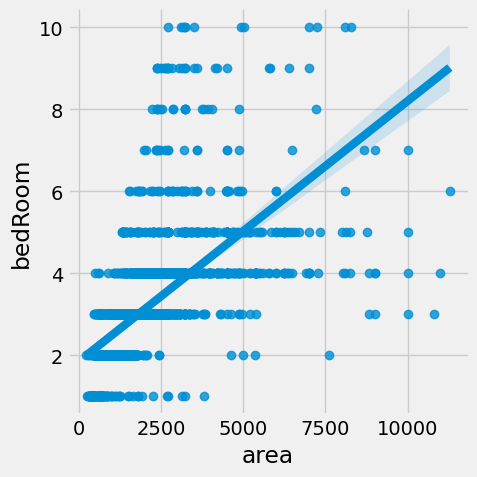

In [228]:
sns.lmplot(data=df, x='area', y='bedRoom')
plt.show()

In [229]:
df.to_csv('../../../../data/raw/nb_data/5. outlier_removed/gurgaon_properties_outlier_treated.csv', index=False)